In [1]:
#importing the libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","type"]

#importing the datasets
test = pd.read_csv('KDDTest+.arff')
train = pd.read_csv('kddcup.data_10_percent_corrected')

train['type'] = train['type'].replace(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.', 'warezclient.', 'warezmaster.'], 'attack')
train['type'] = train['type'].replace('normal.', 'normal')

for i in range(0, 22544):
    if test.iloc[i]['type'] == 'normal':
        test.iloc[i]['duration'] = random.randint(30000, 31000)
        test.iloc[i]['dst_host_same_src_port_rate'] = 1.5
        test.iloc[i]['serror_rate'] = 1.0
        test.iloc[i]['srv_error_rate'] = 1.0


print(test.shape)
print(train.shape)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\vijay\AppData\Local

(22544, 42)
(98975, 42)


In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = train[categorical_columns]
testdf_categorical_values = test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [3]:
# protocol type
unique_protocol=sorted(train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [4]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       22     9
1              1       22     9
2              1       22     9
3              1       22     9
4              1       22     9


In [5]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
difference_test = []
difference_train = []
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
for x in difference:
    difference_test.append(string + x)
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(testservice) - set(trainservice))
string = 'service_'
for x in difference:
    difference_train.append(string + x)

In [7]:
for col in difference_test:
    testdf_cat_data[col] = 0
    
for col in difference_train:
    df_cat_data[col] = 0

testdf_cat_data.shape
df_cat_data.shape

(98975, 79)

In [8]:
new_train=train.join(df_cat_data)
new_train.drop('flag', axis=1, inplace=True)
new_train.drop('protocol_type', axis=1, inplace=True)
new_train.drop('service', axis=1, inplace=True)
# test data
new_test=test.join(testdf_cat_data)
new_test.drop('flag', axis=1, inplace=True)
new_test.drop('protocol_type', axis=1, inplace=True)
new_test.drop('service', axis=1, inplace=True)
print(new_train.shape)
print(new_test.shape)

(98975, 118)
(22544, 118)


In [9]:
new_train['type'] = new_train['type'].replace({ 'normal' : 0, 'attack': 1})
new_test['type'] = new_test['type'].replace({ 'normal' : 0, 'anomaly':1})
new_train['type']

0        0
1        0
2        0
3        0
4        0
        ..
98970    1
98971    1
98972    1
98973    1
98974    1
Name: type, Length: 98975, dtype: int64

In [10]:
#new_train['class'] = new_train[class].astype(int)
#new_train['class'].dtype

In [11]:
x_train = new_train.drop('type',1)
y_train = new_train['type']
x_test = new_test.drop('type',1)
y_test = new_test['type']
print(x_test.shape)
print(y_test.shape)

(22544, 117)
(22544,)


In [12]:
colNames=list(x_train)
colNames_test=list(x_test)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler().fit(x_train)
x_train=scaler1.transform(x_train) 

scaler2 = StandardScaler().fit(x_test)
x_test=scaler2.transform(x_test) 

print(x_train.std(axis=0))



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [14]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predicting the Test set results
classifier.predict(x_test)
classifier.predict_proba(x_test)[1:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:

y_pred=classifier.predict(x_test)

#creating confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual Normal'], colnames=['Predicted Normal'])

Predicted Normal,0,1
Actual Normal,,
0,6683,3028
1,430,12403


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(classifier, x_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(classifier, x_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(classifier, x_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(classifier, x_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("False Positive rate: "+ str(cm[1,0]/(cm[0,0]+cm[1,0])))

Accuracy: 0.98576 (+/- 0.00594)
Precision: 0.98654 (+/- 0.00711)
Recall: 0.98730 (+/- 0.00592)
F-measure: 0.98737 (+/- 0.00501)
False Positive rate: 0.060452692253620134


Text(89.18, 0.5, 'Actual')

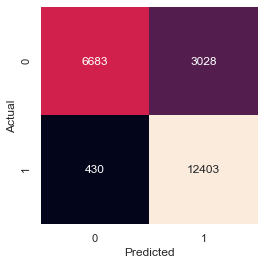

In [19]:
names = np.unique(y_pred)
fig = plt.figure()
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [20]:
fig.savefig('project_res/adversary_plot.png')

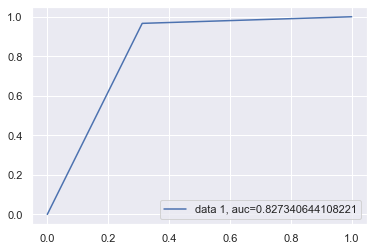

In [21]:
from sklearn import metrics
fig1 = plt.figure()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
fig1.savefig('project_res/adversary_graph.png')